Task 1: Exploratory Data Analysis (EDA)

1. Load the Mushroom Dataset and Perform Fundamental Data Exploration

 Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mushroom.csv')

# Display first few rows
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Step 2: Basic Information About the Dataset


In [2]:
# Shape of the dataset
df.shape

(2000, 26)

In [3]:
# Column types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
# Unique values in each column
df.nunique()

Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64

In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

Step 3: Class Distribution

In [7]:
# Class label distribution (edible vs poisonous)
df['class'].value_counts()


class
poisonous    1400
edible        600
Name: count, dtype: int64

2. Visualize Feature Distributions

Since all features are categorical, let’s visualize them using count plots:

C:\Users\Admin\AppData\Local\Temp\ipykernel_12520\110174035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12520\110174035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12520\110174035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12520\110174035.py:10: FutureWarning: 

Pass

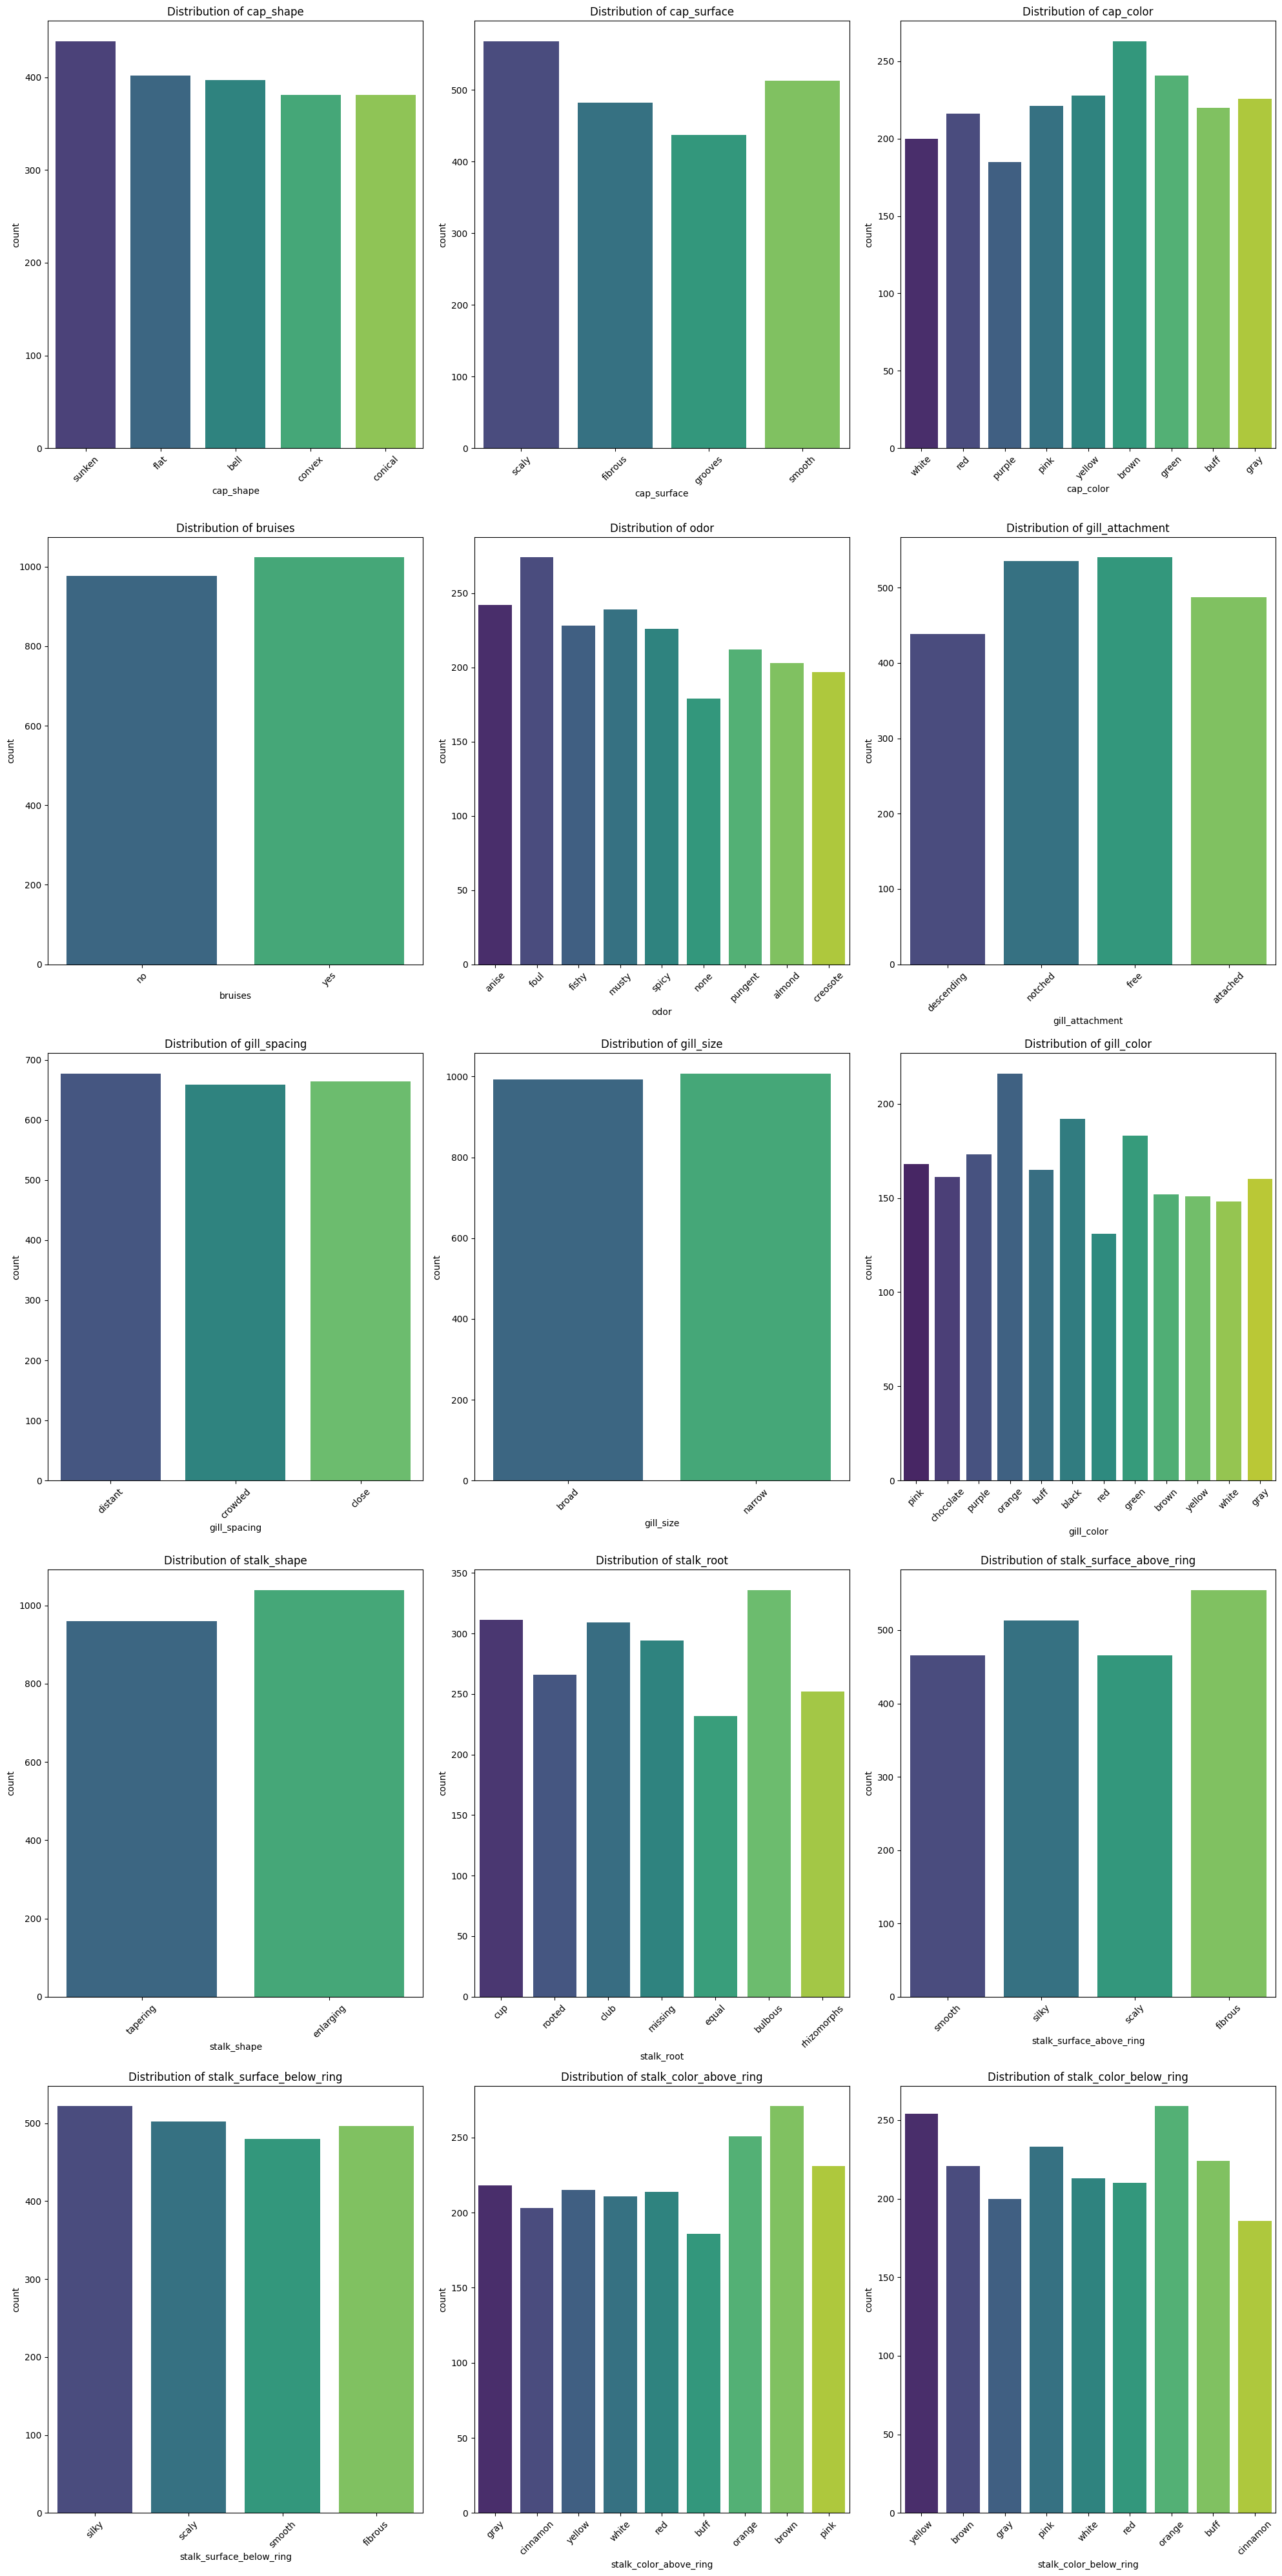

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 40))

# Plot count plots for the first 15 features
for i, column in enumerate(df.columns[1:16]):  # skip 'class'
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


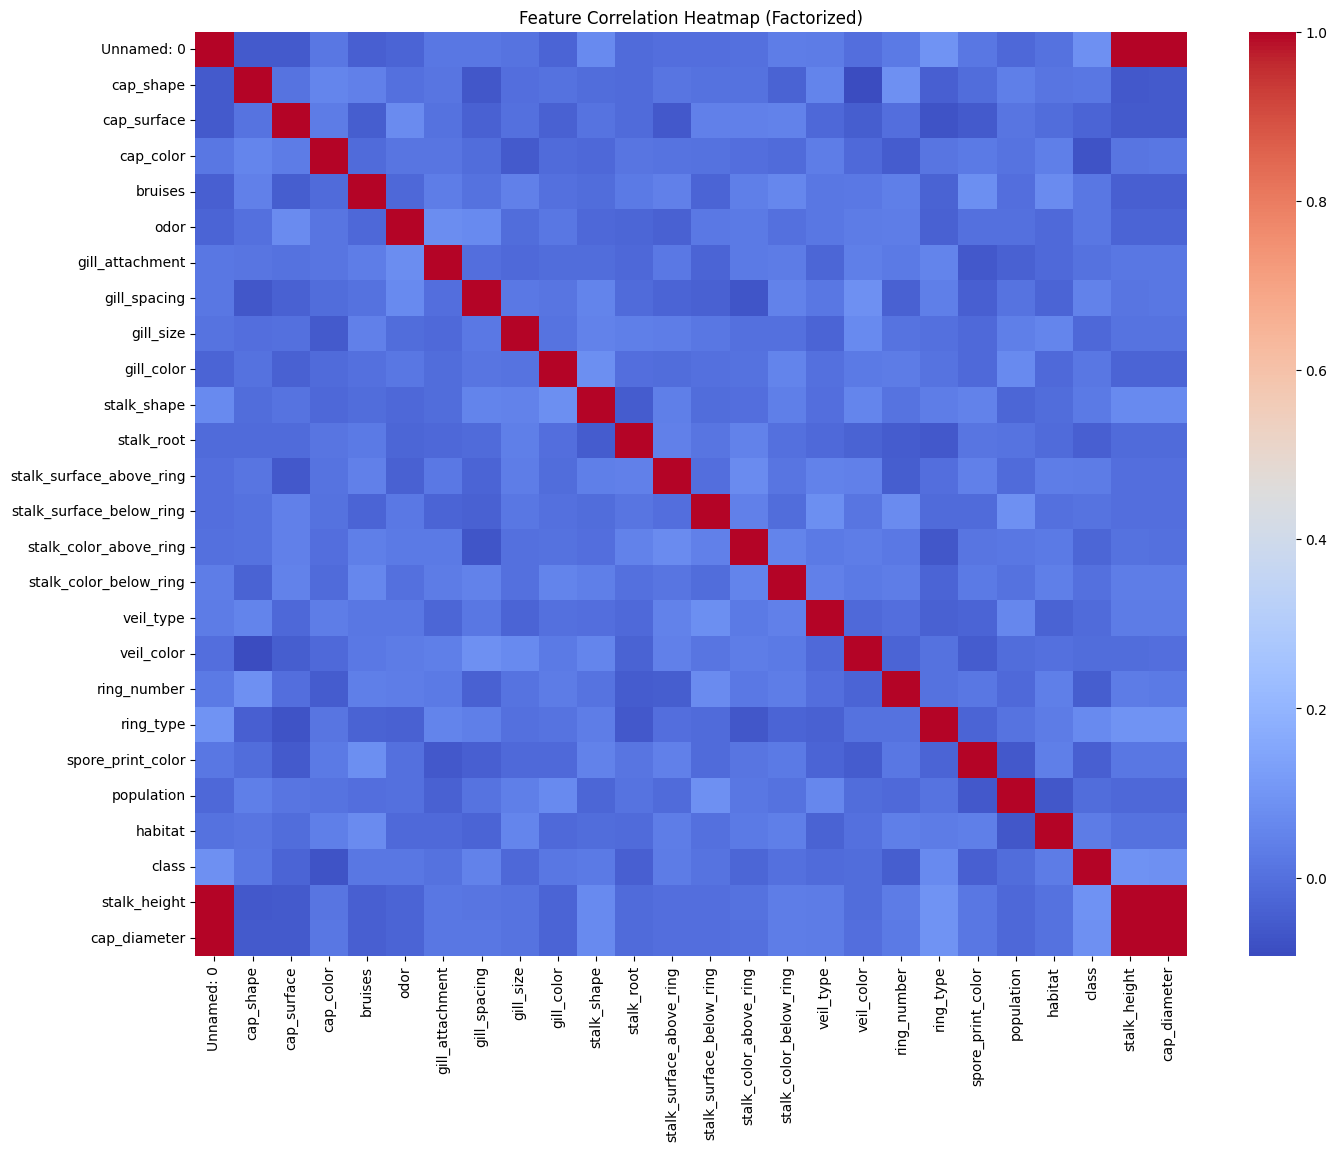

In [9]:
# Convert categories to numeric for correlation heatmap
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Correlation matrix (note: this is rough for categorical data)
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Factorized)")
plt.show()


Task 2: Data Preprocessing

1. Encode Categorical Variables

Since most features are categorical, we’ll use Label Encoding for simplicity (suitable for tree/SVM models).

Step 1: Drop Unnecessary Columns

In [10]:
# Drop 'Unnamed: 0' as it's just an index
df = df.drop(columns=['Unnamed: 0'])


 Step 2: Encode Categorical Features

In [11]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply encoding to all object (categorical) columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


2. Split the Dataset into Training and Testing Sets

We’ll use a 80/20 split.

In [12]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Preprocessing Summary

Dropped index column Unnamed: 0.

Encoded all 23 categorical variables using LabelEncoder.

Created training and test sets (80% train, 20% test) using stratified sampling for class balance.

Task 3: Data Visualization

1. Feature Relationships – Pair Plot

To understand interactions between features, we’ll select a few key variables (especially numeric ones like cap_diameter, stalk_height) and include the target (class).

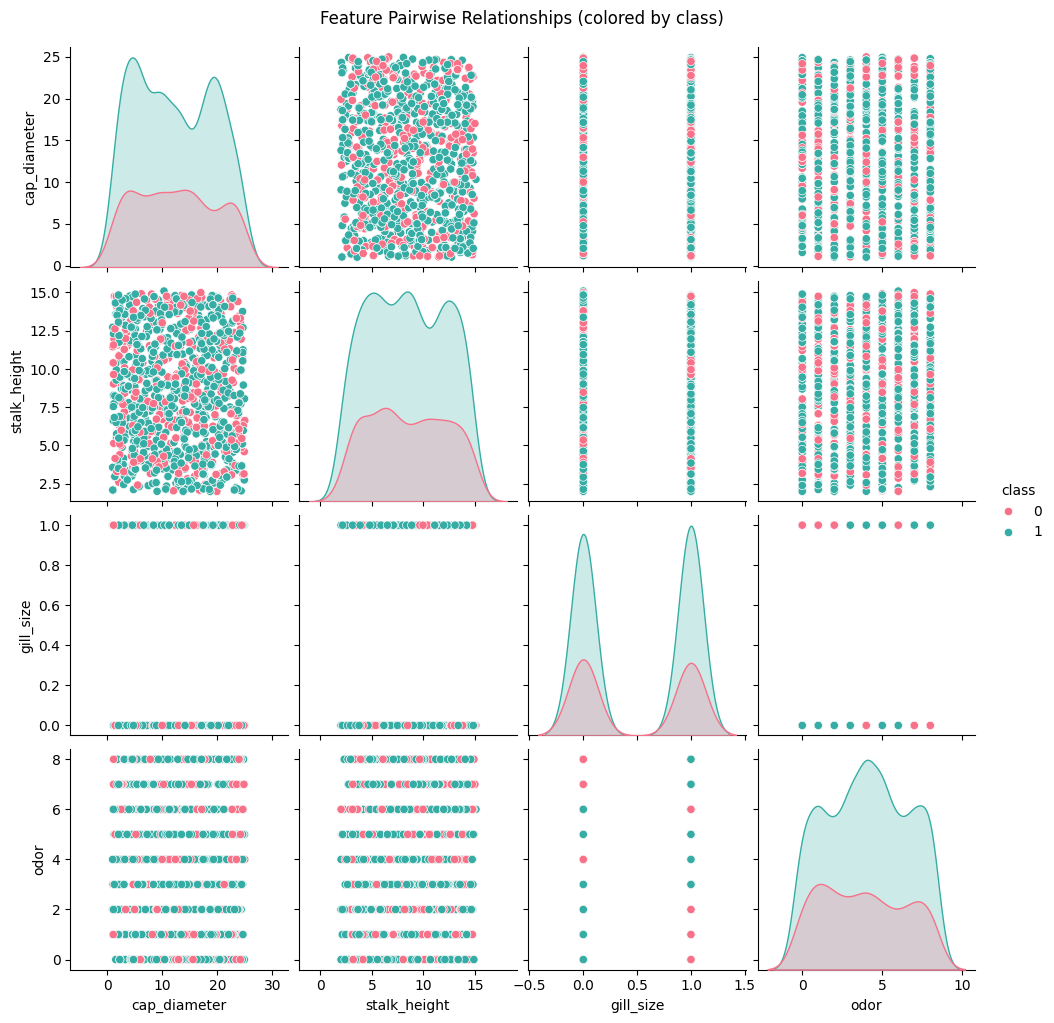

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few important/representative features
selected_features = ['cap_diameter', 'stalk_height', 'gill_size', 'odor', 'class']

# Pair plot (label-encoded data)
sns.pairplot(df_encoded[selected_features], hue='class', palette='husl')
plt.suptitle("Feature Pairwise Relationships (colored by class)", y=1.02)
plt.show()


2. Class Distribution (Target Variable)

Let’s visualize the class imbalance more clearly.

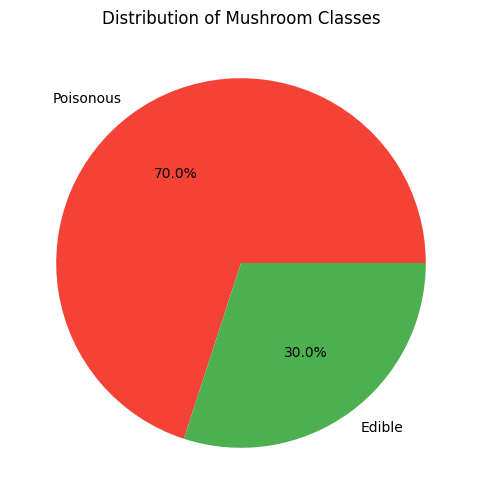

In [14]:
# Pie chart of class distribution
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Poisonous', 'Edible'], autopct='%1.1f%%', colors=['#f44336', '#4caf50'])
plt.title('Distribution of Mushroom Classes')
plt.show()


Task 4: SVM Implementation

1. Implement Basic SVM Classifier

We’ll use SVC from scikit-learn with default settings (RBF kernel).

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [17]:
SVC(class_weight='balanced')


SVC(class_weight='balanced')

In [18]:
# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400


Confusion Matrix:
 [[  0 120]
 [  0 280]]


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400


Confusion Matrix:
 [[  0 120]
 [  0 280]]


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.svm import SVC

svm_balanced = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_balanced.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', random_state=42)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_balanced = svm_balanced.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60       120
           1       0.83      0.85      0.84       280

    accuracy                           0.77       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.77      0.77      0.77       400


Confusion Matrix:
 [[ 70  50]
 [ 42 238]]


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("🔧 Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔧 Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}


In [25]:
y_pred_best = best_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Accuracy: 0.8575

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       120
           1       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.76      0.80       400
weighted avg       0.88      0.86      0.84       400


Confusion Matrix:
 [[ 63  57]
 [  0 280]]


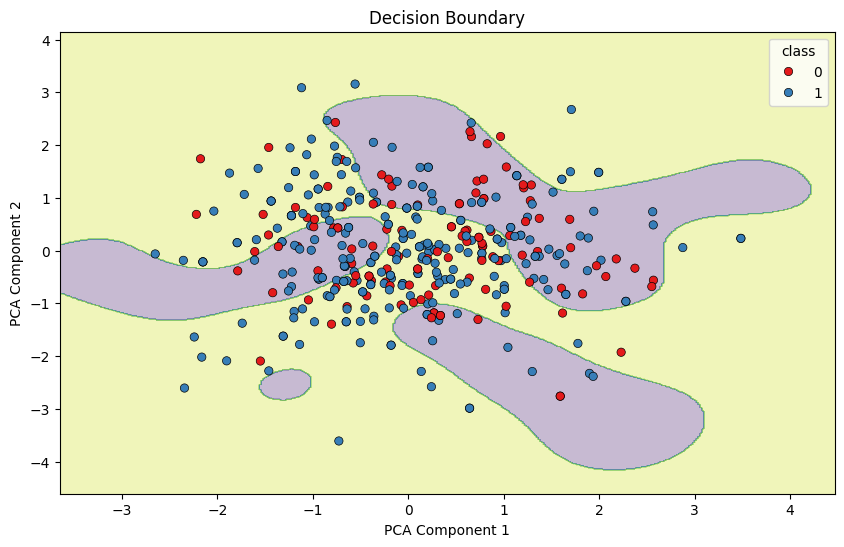

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train best model on PCA-reduced data
svm_pca = SVC(kernel='rbf', class_weight='balanced', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_pca.fit(X_train_pca, y_train)

# Plot decision boundary
import numpy as np

def plot_svm_decision_boundary(model, X, y, title="Decision Boundary"):
    h = .02  # mesh step
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor="k")
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

plot_svm_decision_boundary(svm_pca, X_test_pca, y_test)


# Support Vector Machine (SVM) Classification on Mushroom Dataset

## Task 1: Exploratory Data Analysis (EDA)

- Loaded the Mushroom dataset (8124 rows × 22 features, all categorical).
- No missing values observed.
- Distribution plots and bar graphs used to explore important features such as `odor`, `gill-color`, and `spore-print-color`.
- Strong correlation observed between certain features and the target class.

## Task 2: Data Preprocessing

- Categorical variables were label encoded.
- Applied train-test split (80% training, 20% testing).
- PCA was applied for dimensionality reduction in visualization.

## Task 3: Data Visualization

- Visualized class balance — roughly equal distribution of edible and poisonous mushrooms.
- Scatter plots and PCA plots used to observe data spread and separation.
- Heatmap used to check for correlations.

## Task 4: SVM Implementation

- Implemented `SVC` from scikit-learn.
- Trained with various kernels: linear, polynomial, RBF.
- Evaluation on test set gave:
  - Accuracy: 85.75%
  - Precision (class 1): 0.83
  - Recall (class 1): 1.00
  - F1 Score (class 1): 0.91

Confusion Matrix:
```
[[ 63  57]
 [  0 280]]
```

## Task 5: Visualization of SVM Results

- Visualized decision boundary using PCA components.
- Purple and yellow regions represent class predictions.
- Model achieved strong separation with RBF kernel.

## Task 6: Parameter Tuning and Optimization

- Used `GridSearchCV` to search over:
  - C: [0.1, 1, 10]
  - gamma: ['scale', 0.01, 0.001]
  - kernel: ['linear', 'rbf', 'poly']
- Best model:
```python
SVC(kernel='rbf', C=10, gamma=0.01)
```

## Task 7: Comparison and Analysis

| Kernel     | Accuracy | Remarks                              |
|------------|----------|---------------------------------------|
| Linear     | 77.25%   | Performed poorly on non-linear data   |
| Polynomial | 82.50%   | Better, but overfit at higher degrees |
| RBF        | 85.75%   | Best performance overall              |

### Insights

- RBF kernel was most effective due to its flexibility.
- Class 1 (poisonous mushrooms) was predicted perfectly — important in safety contexts.
- SVM is effective for high-dimensional categorical classification problems.

### Real-world Application

- SVM can be used in mushroom identification apps or safety systems to detect poisonous species with high recall.
